# Capstone Project: Real Estate in Paris
Purpose: Data Analyst Bootcamp - 09.09.2025 - 03.12.2025

Team: Denys  Kravtsov, Małgorzata Kielak, Matthias Herrmann

Project Timeline:  10.10.2025 - 17.11.2025



## SETUP



#### Initialisation

In [ ]:
# Install gdown
!pip install -U gdown

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import gc # garbage collection
import hashlib
from IPython.display import display
from psutil import virtual_memory
import calendar # used for visualization
import os # used for data export
import matplotlib.ticker as ticker # for distribution plot
import numpy as np


#relase memory before start of script
gc.collect()  # release memory

# Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns (using head())
#pd.set_option('display.width', 1000)       # Prevents line wrapping in the notebook

#### Check RAM memory

In [ ]:
#from psutil import virtual_memory
ram = virtual_memory()
print(f"RAM usage: {ram.used / 1e9:.2f} GB / {ram.total / 1e9:.2f} GB ({ram.percent}%)")

RAM usage: 1.03 GB / 13.61 GB (10.1%)



## DATA IMPORT

#### Data Import

In [ ]:
# Import Data from data source:  https://www.data.gouv.fr/

# Year 2022
# Replace the ID by yours (everything from /d to /view)
file_id = '1lCvgHCseOZna7ESPT859h0t0-Nd5ILra'
url = f'https://drive.google.com/uc?id={file_id}'
# Downloading
gdown.download(url, 'ValeursFoncieres-2022.txt', quiet=False) # <= Replace this by the txt file name
# Read the CSV file
df_2022 = pd.read_csv("ValeursFoncieres-2022.txt",sep="|",encoding="utf-8",low_memory=False,decimal=",")
# Filter: Use only properties located in Paris (discard NAN in municipality)
exclude = ['PARIS-L HOPITAL', 'PARISOT']
df_paris_2022 = df_2022[
    df_2022['Commune'].str.startswith("PARIS", na=False) &
    ~df_2022['Commune'].isin(exclude)
]
print("Number of columns in df_2022:", df_2022.shape[0],"and",df_2022.shape[1], "columns")

# Release memory
del df_2022
gc.collect()

# Year 2023
# Replace the ID by yours (everything from /d to /view)
file_id = '13PiQiRXXexUf7HRy4Pxaa-vd3NWbIjj0'
url = f'https://drive.google.com/uc?id={file_id}'
# Downloading
gdown.download(url, 'ValeursFoncieres-2023.txt', quiet=False) # <= Replace this by the txt file name
# Read the CSV file
df_2023 = pd.read_csv("ValeursFoncieres-2023.txt",sep="|",encoding="utf-8",low_memory=False,decimal=",")
# Filter: Use only properties located in Paris (discard NAN in municipality)
exclude = ['PARIS-L HOPITAL', 'PARISOT']
df_paris_2023 = df_2023[
    df_2023['Commune'].str.startswith("PARIS", na=False) &
    ~df_2023['Commune'].isin(exclude)
]
print("Number of columns in df_2023:", df_2023.shape[0],"and",df_2023.shape[1], "columns")

# Release memory
del df_2023
gc.collect()

# Year 2024
# Replace the ID by yours (everything from /d to /view)
file_id = '1RedgJm0tfWnNcXN4Cu7kfznGRL68hyzm'
url = f'https://drive.google.com/uc?id={file_id}'
# Downloading
gdown.download(url, 'ValeursFoncieres-2024.txt', quiet=False) # <= Replace this by the txt file name
# Read the CSV file
df_2024 = pd.read_csv("ValeursFoncieres-2024.txt",sep="|",encoding="utf-8",low_memory=False,decimal=",")
# Filter: Use only properties located in Paris (discard NAN in municipality)
exclude = ['PARIS-L HOPITAL', 'PARISOT']
df_paris_2024 = df_2024[
    df_2024['Commune'].str.startswith("PARIS", na=False) &
    ~df_2024['Commune'].isin(exclude)
]
print("Number of columns in df_2024:", df_2024.shape[0],"and",df_2024.shape[1], "columns")

# Release memory
del df_2024
gc.collect()

Downloading...
From (original): https://drive.google.com/uc?id=1lCvgHCseOZna7ESPT859h0t0-Nd5ILra
From (redirected): https://drive.google.com/uc?id=1lCvgHCseOZna7ESPT859h0t0-Nd5ILra&confirm=t&uuid=4bb9ee63-9809-4a82-9c22-0b315ad8b2b8
To: /content/ValeursFoncieres-2022.txt
100%|██████████| 628M/628M [00:03<00:00, 157MB/s]


Number of columns in df_2022: 4671911 and 43 columns


Downloading...
From (original): https://drive.google.com/uc?id=13PiQiRXXexUf7HRy4Pxaa-vd3NWbIjj0
From (redirected): https://drive.google.com/uc?id=13PiQiRXXexUf7HRy4Pxaa-vd3NWbIjj0&confirm=t&uuid=490599fd-b25a-42e5-87e9-a916394de112
To: /content/ValeursFoncieres-2023.txt
100%|██████████| 508M/508M [00:02<00:00, 215MB/s]


Number of columns in df_2023: 3806978 and 43 columns


Downloading...
From (original): https://drive.google.com/uc?id=1RedgJm0tfWnNcXN4Cu7kfznGRL68hyzm
From (redirected): https://drive.google.com/uc?id=1RedgJm0tfWnNcXN4Cu7kfznGRL68hyzm&confirm=t&uuid=41923425-4e0b-4f96-bac7-df86b3aafcf2
To: /content/ValeursFoncieres-2024.txt
100%|██████████| 461M/461M [00:02<00:00, 186MB/s]


Number of columns in df_2024: 3458643 and 43 columns


114

#### Data Quality check

In [ ]:
# Check if all columns of the 3 data sets are equal
print("All columns are equal?",df_paris_2022.columns.equals(df_paris_2023.columns) and df_paris_2023.columns.equals(df_paris_2024.columns))
# Check if all columns have the same sequence
print("Do all have the same sequence of columns?",df_paris_2022.columns.tolist() == df_paris_2023.columns.tolist() == df_paris_2024.columns.tolist())

# Compare number of columns
print("Number of columns in df_paris_2022:", df_paris_2022.shape[1], "columns")
print("Number of columns in df_paris_2023:", df_paris_2023.shape[1], "columns")
print("Number of columns in df_paris_2022:", df_paris_2024.shape[1], "columns")

communes_2022 = sorted(df_paris_2022['Commune'].dropna().unique())
communes_2023 = sorted(df_paris_2023['Commune'].dropna().unique())
communes_2024 = sorted(df_paris_2024['Commune'].dropna().unique())

# Check Paris filter - We do not include PARIS-L HOPITAL and PARISOT that are other cities
df_compare = pd.DataFrame({
    '2022': communes_2022,
    '2023': communes_2023,
    '2024': communes_2024
})
#display(df_compare)


All columns are equal? True
Do all have the same sequence of columns? True
Number of columns in df_paris_2022: 43 columns
Number of columns in df_paris_2023: 43 columns
Number of columns in df_paris_2022: 43 columns


## DATA PREPROCESSING PART I

#### Merge datasets

In [ ]:
# Merge all datasets and index will be new numerated

df_temp = pd.concat([df_paris_2022, df_paris_2023], ignore_index=True)
del df_paris_2022, df_paris_2023  # delete old data frame
gc.collect()  # release memory

df_all = pd.concat([df_temp, df_paris_2024], ignore_index=True)
del df_temp, df_paris_2024 # delete old data frame
gc.collect()  # release memory

0

#### Translations

In [ ]:
#Dictionary to translate column names from french to english
translations = {
    'Identifiant de document': 'Document Identifier','Reference document': 'Reference Document',
    '1 Articles CGI': '1 CGI Articles','2 Articles CGI': '2 CGI Articles',
    '3 Articles CGI': '3 CGI Articles','4 Articles CGI': '4 CGI Articles','5 Articles CGI': '5 CGI Articles',
    'No disposition': 'No Disposition','Date mutation': 'Transaction Date',
    'Nature mutation': 'Nature of Transaction','Valeur fonciere': 'Property Value',
    'No voie': 'Street Number','B/T/Q': 'Building/Tower/Block',
    'Type de voie': 'Street Type','Code voie': 'Street Code',
    'Voie': 'Street Name','Code postal': 'Postal Code',
    'Commune': 'Municipality','Code departement': 'Department Code',
    'Code commune': 'Municipality Code','Prefixe de section': 'Section Prefix',
    'Section': 'Section','No plan': 'Plan Number','No Volume': 'Volume Number',
    '1er lot': '1st Lot','Surface Carrez du 1er lot': 'square meter area of 1st Lot',
    '2eme lot': '2nd Lot','Surface Carrez du 2eme lot': 'square meter area of 2nd Lot',
    '3eme lot': '3rd Lot','Surface Carrez du 3eme lot': 'square meter area of 3rd Lot',
    '4eme lot': '4th Lot','Surface Carrez du 4eme lot': 'square meter area of 4th Lot',
    '5eme lot': '5th Lot','Surface Carrez du 5eme lot': 'square meter area of 5th Lot','Nombre de lots': 'Number of Lots',
    'Code type local': 'Local Type Code','Type local': 'Local Type',
    'Identifiant local': 'Local Identifier','Surface reelle bati': 'Actual Built Surface',
    'Nombre pieces principales': 'Number of Main Rooms',
    'Nature culture': ' the type of land involved in the transfer (building land, woodland, pasture, quarry, etc.)',
    'Nature culture speciale': 'Special Subtype of land','Surface terrain': 'Land Surface',
}

# Remove empty spaces
df_all.columns = df_all.columns.str.strip()

# Rename columns by means of the dictionary provided
df_all.rename(columns=translations, inplace=True)

# Show if there are remaining french columns
remaining_french_to_translate = [
    col for col in df_all.columns
    if col in translations.keys() and col != translations[col]
]
print("Columns still need translation:", remaining_french_to_translate)

# Check length of dictionary versus number of columns in dataset
print("Number of columns in the dataframe:", len(df_all.columns))
print("Number of columns:",  df_all.shape[1])


Columns still need translation: []
Number of columns in the dataframe: 43
Number of columns: 43


In [ ]:
# Dictionary to translate entries of 'Nature of Transaction' from french to english
transaction_map = {
    'Vente': 'Sale',
    'Echange': 'Exchange',
    'Adjudication': 'Auction',
    "Vente en l'état futur d'achèvement": 'Sale of property under construction',
    'Vente terrain à bâtir': 'Sale of land for building'
}
df_all['Nature of Transaction'] = df_all['Nature of Transaction'].map(transaction_map).fillna(df_all['Nature of Transaction'])

In [ ]:
# Dictionary to translate entries of 'Local Type' from french to english
type_map = {
    'Appartement': 'Apartment',
    'Maison': 'House',
    'Dépendance': 'Outbuilding',
    'Local industriel. commercial ou assimilé': 'Commercial'
}
df_all['Local Type'] = df_all['Local Type'].map(type_map).fillna(df_all['Local Type'])

#### Data frame check

In [ ]:
# Check the shape
rows, cols = df_all.shape
# Check duplicates
duplicates = df_all.duplicated().sum()
duplicate_pct = duplicates / rows * 100

print(f"DataFrame Size (Paris, 2022,2023,2024): {rows:,} rows × {cols:,} columns".replace(",", "."))
print(f"Gesamtzeilen: {rows:,}".replace(",", "."))
print(f"Complete duplicates: {duplicates:,} ({duplicate_pct:.2f}%)".replace(",", "."))

DataFrame Size (Paris. 2022.2023.2024): 253.392 rows × 43 columns
Gesamtzeilen: 253.392
Complete duplicates: 25.154 (9.93%)


#### Check memory (just for info to see if RAM is full)

In [ ]:
ram = virtual_memory()
print(f"{ram.used/1e9:.2f} GB used of {ram.total/1e9:.2f} GB ({ram.percent}%)")

1.12 GB used of 13.61 GB (10.7%)


#### Check Dataset shape ( number of columns, rows)

In [ ]:
print("Number of columns in df_all:", df_all.shape[0],"and",df_all.shape[1], "columns")

Number of columns in df_all: 253392 and 43 columns


## DATA EXPLORATION

#### Data Exploration to fill Data Audit Sheet (missing values,general statistics KPIs,...)

In [ ]:
# Show first rows of data set
df_all.head()

,Document Identifier,Reference Document,1 CGI Articles,2 CGI Articles,3 CGI Articles,4 CGI Articles,5 CGI Articles,No Disposition,Transaction Date,Nature of Transaction,Property Value,Street Number,Building/Tower/Block,Street Type,Street Code,Street Name,Postal Code,Municipality,Department Code,Municipality Code,Section Prefix,Section,Plan Number,Volume Number,1st Lot,square meter area of 1st Lot,2nd Lot,square meter area of 2nd Lot,3rd Lot,square meter area of 3rd Lot,4th Lot,square meter area of 4th Lot,5th Lot,square meter area of 5th Lot,Number of Lots,Local Type Code,Local Type,Local Identifier,Actual Built Surface,Number of Main Rooms,"the type of land involved in the transfer (building land, woodland, pasture, quarry, etc.)",Special Subtype of land,Land Surface
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Sale,580000.0,13.0,NaN,RUE,9002,DE SOFIA,75018.0,PARIS 18,75,118,NaN,BR,26,NaN,55,61.0,58,NaN,8,NaN,NaN,NaN,NaN,NaN,3,3.0,Outbuilding,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Sale,580000.0,13.0,NaN,RUE,9002,DE SOFIA,75018.0,PARIS 18,75,118,NaN,BR,26,NaN,25,NaN,56,61.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Apartment,NaN,20.0,2.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Sale,580000.0,13.0,NaN,RUE,9002,DE SOFIA,75018.0,PARIS 18,75,118,NaN,BR,26,NaN,55,61.0,58,NaN,8,NaN,NaN,NaN,NaN,NaN,3,2.0,Apartment,NaN,25.0,2.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Sale,580000.0,13.0,NaN,RUE,9002,DE SOFIA,75018.0,PARIS 18,75,118,NaN,BR,26,NaN,25,NaN,56,61.0,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Outbuilding,NaN,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Sale,605000.0,51.0,NaN,RUE,1880,CHARLOT,75003.0,PARIS 03,75,103,NaN,AH,72,NaN,13,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.0,Outbuilding,NaN,0.0,0.0,NaN,NaN,NaN


In [ ]:
# Shows missing values in percentage
display((df_all.isna().mean() * 100).round(2))

,0
Document Identifier,100.00
Reference Document,100.00
1 CGI Articles,100.00
2 CGI Articles,100.00
3 CGI Articles,100.00
4 CGI Articles,100.00
5 CGI Articles,100.00
No Disposition,0.00
Transaction Date,0.00
Nature of Transaction,0.00


In [ ]:
# Shows the completeness of the columns (non-null = number of non-empty cells in the column)
df_all.info(show_counts=True, verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253392 entries, 0 to 253391
Data columns (total 43 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Document Identifier                                                                          0 non-null       float64
 1   Reference Document                                                                           0 non-null       float64
 2   1 CGI Articles                                                                               0 non-null       float64
 3   2 CGI Articles                                                                               0 non-null       float64
 4   3 CGI Articles                                                                               0 non-null       float64
 5   4 CGI Articles         

In [ ]:
#Display common statstics values (parameter "all" also show categorical values (count,unique,top (Mode), freq)
#display(df_all.describe(include='all'))

# Display common statstics values (parameter "all" also show categorical values (count,unique,top (Mode), freq) - The positions of columns and rows have been swapped; it’s easier for me to interpret the information this way
display(df_all.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Document Identifier,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reference Document,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 CGI Articles,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 CGI Articles,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 CGI Articles,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 CGI Articles,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5 CGI Articles,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No Disposition,253392.0,NaN,NaN,NaN,1.008745,0.102007,1.0,1.0,1.0,1.0,7.0
Transaction Date,253392,894,19/04/2022,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nature of Transaction,253392,6,Sale,249080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Shows the data categories according to the classification used in the audit sheet
def classify_variable(df):
    info = []
    for col in df.columns:
        try:
            unique = df[col].nunique(dropna=True)
        except TypeError:
            # If column cointains lists or other non- hashable values
            unique = "n/a (unhashable type)"
        dtype = df[col].dtype
        if isinstance(unique, int):
            if unique == len(df):
                var_type = "Unique Value"
            elif pd.api.types.is_numeric_dtype(dtype):
                var_type = "Quantitative"
            elif unique == 2:
                var_type = "Categorical - Binary"
            elif 3 <= unique <= 5:
                var_type = "Categorical - 3 to 5 categories"
            elif 6 <= unique <= 10:
                var_type = "Categorical - 6 to 10 categories"
            else:
                var_type = "Categorical - more than 10 categories"
        else:
            var_type = "Unhashable / Complex Type"
        info.append((col, unique, var_type))
    return pd.DataFrame(info, columns=["Column", "Unique Values", "Category Type"])

display(classify_variable(df_all))


,Column,Unique Values,Category Type
0,Document Identifier,0,Quantitative
1,Reference Document,0,Quantitative
2,1 CGI Articles,0,Quantitative
3,2 CGI Articles,0,Quantitative
4,3 CGI Articles,0,Quantitative
5,4 CGI Articles,0,Quantitative
6,5 CGI Articles,0,Quantitative
7,No Disposition,7,Quantitative
8,Transaction Date,894,Categorical - more than 10 categories
9,Nature of Transaction,6,Categorical - 6 to 10 categories


## DATA CLEANING

#### Improve column naming

In [ ]:
# Clean Column using the common "snake_case" convention and sort them

# Replace all spaces with underscores
df_all.columns = df_all.columns.str.replace(' ', '_')
# Convert all column names to lowercase (optional)
df_all.columns = df_all.columns.str.lower()
# Sort columns by name
df_all = df_all[sorted(df_all.columns)]

#### Overview of missing values

In [ ]:
# Calculate missing value by column in %
missing_pct = df_all.isna().mean() * 100

# Create overview dataframe
missing_summary = pd.DataFrame({
    'column': df_all.columns,
    'missing_count': df_all.isna().sum(),
    'missing_pct': missing_pct
})
# Mark columns with less than 100% missing values
missing_summary['missing_category'] = missing_summary['missing_pct'].apply(
    lambda x: 'No Missing' if x == 0 else ('Partial Missing' if x < 100 else 'All Missing')
)

# Remove Index
missing_summary = missing_summary.reset_index(drop=True)

# Sort by missing values and column name %
missing_summary = missing_summary.sort_values(by=['missing_pct','column'],ascending=[False, True])

missing_summary

,column,missing_count,missing_pct,missing_category
0,1_cgi_articles,253392,100.000000,All Missing
2,2_cgi_articles,253392,100.000000,All Missing
4,3_cgi_articles,253392,100.000000,All Missing
6,4_cgi_articles,253392,100.000000,All Missing
8,5_cgi_articles,253392,100.000000,All Missing
14,document_identifier,253392,100.000000,All Missing
16,local_identifier,253392,100.000000,All Missing
28,reference_document,253392,100.000000,All Missing
30,section_prefix,253392,100.000000,All Missing
36,square_meter_area_of_5th_lot,253149,99.904101,Partial Missing


#### Delete columns with 100% missing values

In [ ]:
# CHECK COLUMNS WITH 100% MISSING VALUES

# Calculate percentage of missing calues per column
missing_ratio = df_all.isna().mean()

# Select columns which have 100% missing values
cols_to_drop = missing_ratio[missing_ratio == 1.0].index.tolist()
print("\nColumns with 100% missing values:", cols_to_drop)

# Delete these columns with 100% missing values
df_all.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped {len(cols_to_drop)} columns with 100% missing values")
print("Remaining columns:", df_all.shape[1])

#gc.collect()


Columns with 100% missing values: ['1_cgi_articles', '2_cgi_articles', '3_cgi_articles', '4_cgi_articles', '5_cgi_articles', 'document_identifier', 'local_identifier', 'reference_document', 'section_prefix']
Dropped 9 columns with 100% missing values
Remaining columns: 34


#### Overview of missing values

In [ ]:
# Calculate missing value by column in %
missing_pct = df_all.isna().mean() * 100

# Create overview dataframe
missing_summary = pd.DataFrame({
    'column': df_all.columns,
    'missing_count': df_all.isna().sum(),
    'missing_pct': missing_pct
})
# Mark columns with less than 100% missing values
missing_summary['missing_category'] = missing_summary['missing_pct'].apply(
    lambda x: 'No Missing' if x == 0 else ('Partial Missing' if x < 100 else 'All Missing')
)

# Remove Index
missing_summary = missing_summary.reset_index(drop=True)

# Sort by missing values and column name %
missing_summary = missing_summary.sort_values(by=['missing_pct','column'],ascending=[False, True])

missing_summary

,column,missing_count,missing_pct,missing_category
27,square_meter_area_of_5th_lot,253149,99.904101,Partial Missing
22,special_subtype_of_land,253047,99.863847,Partial Missing
26,square_meter_area_of_4th_lot,252632,99.700069,Partial Missing
33,volume_number,252231,99.541817,Partial Missing
4,5th_lot,250654,98.919461,Partial Missing
25,square_meter_area_of_3rd_lot,250411,98.823562,Partial Missing
3,4th_lot,246647,97.338116,Partial Missing
7,building/tower/block,242676,95.770979,Partial Missing
2,3rd_lot,235086,92.775620,Partial Missing
5,_the_type_of_land_involved_in_the_transfer_(bu...,229280,90.484309,Partial Missing


#### Impute missing values for 2nd,3rd,4th,5th lots

In [ ]:
# IMPUTE MISSING VALUES vor 1st, 2nd LOTS

# Since when we have e.g. only one lot, the others are empty. Thats why we can impute these values thoughless
# Lists of lots and areas
lot_cols = ['1st_lot', '2nd_lot', '3rd_lot', '4th_lot', '5th_lot']
area_cols = [
    'square_meter_area_of_1st_lot',
    'square_meter_area_of_2nd_lot',
    'square_meter_area_of_3rd_lot',
    'square_meter_area_of_4th_lot',
    'square_meter_area_of_5th_lot'
]
# Fill lots with NaN with label
for col in lot_cols:
    df_all[col] = df_all[col].fillna("No other lot")

# Fill areas with NaN with label n
for col in area_cols:
    df_all[col] = df_all[col].fillna(0)

#### Delete columns with >90% missing values

In [ ]:
# Calculate percentage of missing values per column
missing_ratio = df_all.isna().mean()

# Select columns which have >90% missing values
cols_to_drop = missing_ratio[missing_ratio > 0.9].index.tolist()
print("\nColumns with >90% missing values:", cols_to_drop)

# Delete these columns
df_all.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped {len(cols_to_drop)} columns with >90% missing values")
print("Remaining columns:", df_all.shape[1])


Columns with >90% missing values: ['_the_type_of_land_involved_in_the_transfer_(building_land,_woodland,_pasture,_quarry,_etc.)', 'building/tower/block', 'land_surface', 'special_subtype_of_land', 'volume_number']
Dropped 5 columns with >90% missing values
Remaining columns: 29


#### Impute missing values for remaining columns with <2% missing values

In [ ]:
# Numerical columns: fill NaN with median (more robust than mean)
num_cols = ['property_value', 'actual_built_surface', 'number_of_main_rooms']
for col in num_cols:
    median_val = df_all[col].median()
    df_all[col] = df_all[col].fillna(median_val)

# Categorical columns: fill NaN with unknown (alternative could bethe mode)
cat_cols = ['local_type','local_type_code','street_type','street_number','postal_code','street_code','street_name']
for col in cat_cols:
    #mode_val = df_all[col].mode()[0]  # häufigster Wert
    #df_all[col] = df_all[col].fillna(mode_val)
    df_all[col] = df_all[col].fillna("Unknown")

#### Overview of missing values

In [ ]:
# Calculate missing value by column in %
missing_pct = df_all.isna().mean() * 100

# Create overview dataframe
missing_summary = pd.DataFrame({
    'column': df_all.columns,
    'missing_count': df_all.isna().sum(),
    'missing_pct': missing_pct
})
# Mark columns with less than 100% missing values
missing_summary['missing_category'] = missing_summary['missing_pct'].apply(
    lambda x: 'No Missing' if x == 0 else ('Partial Missing' if x < 100 else 'All Missing')
)

# Remove Index
missing_summary = missing_summary.reset_index(drop=True)

# Sort by missing values and column name %
missing_summary = missing_summary.sort_values(by=['missing_pct','column'],ascending=[False, True])

missing_summary

,column,missing_count,missing_pct,missing_category
0,1st_lot,0,0.0,No Missing
1,2nd_lot,0,0.0,No Missing
2,3rd_lot,0,0.0,No Missing
3,4th_lot,0,0.0,No Missing
4,5th_lot,0,0.0,No Missing
5,actual_built_surface,0,0.0,No Missing
6,department_code,0,0.0,No Missing
7,local_type,0,0.0,No Missing
8,local_type_code,0,0.0,No Missing
9,municipality,0,0.0,No Missing


#### Check data frame

In [ ]:
# Check the shape
rows, cols = df_all.shape
# Check duplicates
duplicates = df_all.duplicated().sum()
duplicate_pct = duplicates / rows * 100

print(f"DataFrame Size (Paris, 2022,2023,2024): {rows:,} rows × {cols:,} columns".replace(",", "."))
print(f"Gesamtzeilen: {rows:,}".replace(",", "."))
print(f"Complete duplicates: {duplicates:,} ({duplicate_pct:.2f}%)".replace(",", "."))

DataFrame Size (Paris. 2022.2023.2024): 253.392 rows × 29 columns
Gesamtzeilen: 253.392
Complete duplicates: 26.034 (10.27%)


#### Correct column formats

In [ ]:
# ID- and Code columns as object
df_all['municipality_code'] = df_all['municipality_code'].astype(object)
df_all['postal_code'] = df_all['postal_code'].astype(object)
df_all['street_type'] = df_all['street_type'].astype(object)
df_all['street_number'] = df_all['street_number'].astype(object)
df_all['street_code'] = df_all['street_code'].astype(object)
df_all['street_name'] = df_all['street_name'].astype(object)
df_all['local_type_code'] = df_all['local_type_code'].astype(object)
# Categorical columns as object
#df_all['5th_lot'] = df_all['5th_lot'].astype(object)

# Numerical columns

df_all['no_disposition'] = df_all['no_disposition'].astype(int)
df_all['number_of_lots'] = df_all['number_of_lots'].astype(int)
df_all['number_of_main_rooms'] = df_all['number_of_main_rooms'].astype(float)
df_all['plan_number'] = df_all['plan_number'].astype(int)

# Date column to datetime format (check before which format: french : first day first)
df_all['transaction_date'] = pd.to_datetime(df_all['transaction_date'], errors='coerce', dayfirst=True)

#Release memory
gc.collect()

11

#### Rename columns

In [ ]:
#Change column name (its to long)
df_all.rename(columns={
    '_the_type_of_land_involved_in_the_transfer_(building_land,_woodland,_pasture,_quarry,_etc.)': 'land_type'
}, inplace=True)


#### Add columns for analysis

In [ ]:
df_all['year'] = df_all['transaction_date'].dt.year
#df_all['year'] = df_all['year'].astype('Int64')
df_all['year'] = df_all['year'].astype(int)
df_all['month'] = df_all['transaction_date'].dt.month
#df_all['month'] = df_all['month'].astype('Int64')
df_all['month'] = df_all['month'].astype(int)

#### Change column sequenze (for a better overview)

In [ ]:
# Define groups for column order
id_cols = [
    'no_disposition','plan_number','local_type','local_type_code'
]
address_cols = [
    'street_name', 'street_number', 'postal_code', 'municipality',
    'municipality_code', 'section', 'street_type', 'street_code'
]
property_cols = [
    '1st_lot', '2nd_lot', '3rd_lot', '4th_lot', '5th_lot'

]
numeric_cols = [
    'actual_built_surface', 'property_value',
    'square_meter_area_of_1st_lot', 'square_meter_area_of_2nd_lot',
    'square_meter_area_of_3rd_lot', 'square_meter_area_of_4th_lot',
    'square_meter_area_of_5th_lot', 'number_of_lots', 'number_of_main_rooms'
]
other_cols = [
    'year','month','nature_of_transaction', 'transaction_date', 'department_code'
]
# New column sequenze
new_order = id_cols + other_cols + address_cols + property_cols + numeric_cols

# Re-Index DataFrame
df_all = df_all.reindex(columns=new_order)

# delete old data frame
del new_order
# release memory
gc.collect()

df_all.head()


,no_disposition,plan_number,local_type,local_type_code,year,month,nature_of_transaction,transaction_date,department_code,street_name,street_number,postal_code,municipality,municipality_code,section,street_type,street_code,1st_lot,2nd_lot,3rd_lot,4th_lot,5th_lot,actual_built_surface,property_value,square_meter_area_of_1st_lot,square_meter_area_of_2nd_lot,square_meter_area_of_3rd_lot,square_meter_area_of_4th_lot,square_meter_area_of_5th_lot,number_of_lots,number_of_main_rooms
0,1,26,Outbuilding,3.0,2022,1,Sale,2022-01-04,75,DE SOFIA,13.0,75018.0,PARIS 18,118,BR,RUE,9002,55,58,8,No other lot,No other lot,0.0,580000.0,61.0,0.0,0.0,0.0,0.0,3,0.0
1,1,26,Apartment,2.0,2022,1,Sale,2022-01-04,75,DE SOFIA,13.0,75018.0,PARIS 18,118,BR,RUE,9002,25,56,No other lot,No other lot,No other lot,20.0,580000.0,0.0,61.0,0.0,0.0,0.0,2,2.0
2,1,26,Apartment,2.0,2022,1,Sale,2022-01-04,75,DE SOFIA,13.0,75018.0,PARIS 18,118,BR,RUE,9002,55,58,8,No other lot,No other lot,25.0,580000.0,61.0,0.0,0.0,0.0,0.0,3,2.0
3,1,26,Outbuilding,3.0,2022,1,Sale,2022-01-04,75,DE SOFIA,13.0,75018.0,PARIS 18,118,BR,RUE,9002,25,56,No other lot,No other lot,No other lot,0.0,580000.0,0.0,61.0,0.0,0.0,0.0,2,0.0
4,1,72,Outbuilding,3.0,2022,1,Sale,2022-01-06,75,CHARLOT,51.0,75003.0,PARIS 03,103,AH,RUE,1880,13,14,No other lot,No other lot,No other lot,0.0,605000.0,0.0,0.0,0.0,0.0,0.0,2,0.0


#### Check Data frame (info)

In [ ]:
df_all.info(show_counts=True, verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253392 entries, 0 to 253391
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   no_disposition                253392 non-null  int64         
 1   plan_number                   253392 non-null  int64         
 2   local_type                    253392 non-null  object        
 3   local_type_code               253392 non-null  object        
 4   year                          253392 non-null  int64         
 5   month                         253392 non-null  int64         
 6   nature_of_transaction         253392 non-null  object        
 7   transaction_date              253392 non-null  datetime64[ns]
 8   department_code               253392 non-null  object        
 9   street_name                   253392 non-null  object        
 10  street_number                 253392 non-null  object        
 11  postal_code  

#### Check for double entries

In [ ]:
# Length of dataset
total_rows = len(df_all)

# Count duplicates
all_dupes = df_all.duplicated(keep=False).sum()
percent_all_dupes = 100 * all_dupes / total_rows

# Count duplicates with keep='first'(which would be deleted with drop_duplicates())
first_dupes = df_all.duplicated(keep='first').sum()
percent_first_dupes = 100 * first_dupes / total_rows

print(f"Total rows: {total_rows}")
print(f"All duplicates (keep=False): {all_dupes} ({percent_all_dupes:.2f}%)")
print(f"Duplicates (keep='first'): {first_dupes} ({percent_first_dupes:.2f}%)")

# Delete duplicate (keep only one row if the row exists several times)
df_all = df_all.drop_duplicates().reset_index(drop=True)


Total rows: 253392
All duplicates (keep=False): 36062 (14.23%)
Duplicates (keep='first'): 26034 (10.27%)


In [ ]:
# Check after deleting duplicates
# Length of dataset
total_rows = len(df_all)

# Count duplicates
all_dupes = df_all.duplicated(keep=False).sum()
percent_all_dupes = 100 * all_dupes / total_rows

# Count duplicates with keep='first'(which would be deleted with drop_duplicates())
first_dupes = df_all.duplicated(keep='first').sum()
percent_first_dupes = 100 * first_dupes / total_rows

print(f"Total rows: {total_rows}")
print(f"All duplicates (keep=False): {all_dupes} ({percent_all_dupes:.2f}%)")
print(f"Duplicates (keep='first'): {first_dupes} ({percent_first_dupes:.2f}%)")

Total rows: 227358
All duplicates (keep=False): 0 (0.00%)
Duplicates (keep='first'): 0 (0.00%)


#### Check data frame

In [ ]:
# Check the shape
rows, cols = df_all.shape
# Check duplicates
duplicates = df_all.duplicated().sum()
duplicate_pct = duplicates / rows * 100

print(f"DataFrame Size (Paris, 2022,2023,2024): {rows:,} rows × {cols:,} columns".replace(",", "."))
print(f"Gesamtzeilen: {rows:,}".replace(",", "."))
print(f"Complete duplicates: {duplicates:,} ({duplicate_pct:.2f}%)".replace(",", "."))

DataFrame Size (Paris. 2022.2023.2024): 227.358 rows × 31 columns
Gesamtzeilen: 227.358
Complete duplicates: 0 (0.00%)


## DATA PREPROCESSING PART II

#### Create property ID (unic key for each address)

In [ ]:
#Choose columns for primary key
key_cols = [
    'municipality',
    'street_name',
    'street_number',
    'postal_code',
    'section',
    'plan_number',
]
#Fill Missing values and change to String
df_all[key_cols] = df_all[key_cols].fillna('').astype(str)

#Create unique ID („property_id“) per property
df_all['property_id'] = df_all[key_cols].apply(
    lambda row: hashlib.md5('_'.join(row.values).encode()).hexdigest()[:8],
    axis=1
)
# Bring last column to the front
df_all = df_all[['property_id'] + [c for c in df_all.columns if c != 'property_id']]

# Sort data frame by property_id
df_all = df_all.sort_values(by='property_id')

#display(df_all.head(10))
#display(df_all.info(show_counts=True, verbose=True, memory_usage='deep'))

#### Create property unit ID (unic key for each address + property type + lot number)

In [ ]:
# Clean local_type
df_all["local_type"] = (
    df_all["local_type"]
    .astype(str)
    .str.strip()
    .str.replace(" ", "_")   # replace spaces by _
    .str.replace("-", "_")   # avoid double delimiter
)
# Create property_unit_id  (property_id + lot + local_type)
df_all["property_unit_id"] = (
    df_all["property_id"].astype(str)
    + "-"
    + df_all[["1st_lot", "2nd_lot", "3rd_lot", "4th_lot", "5th_lot"]]
        .bfill(axis=1).iloc[:, 0]  # first non-empty lot number
        .astype(str)
    + "-"
    + df_all["local_type"].astype(str)
)

In [ ]:
# Check if property_id are handeled as primary key
df_all["property_unit_id"] = df_all["property_unit_id"].astype(str)

# Check for duplicates
duplicates = df_all[df_all["property_unit_id"].duplicated()]
print(f"🔍 Doppelte property_unit_id: {len(duplicates)}")

# Show (not delete) duplicates)
if len(duplicates) > 0:
   display(duplicates.head())

🔍 Doppelte property_unit_id: 13828


,property_id,no_disposition,plan_number,local_type,local_type_code,year,month,nature_of_transaction,transaction_date,department_code,street_name,street_number,postal_code,municipality,municipality_code,section,street_type,street_code,1st_lot,2nd_lot,3rd_lot,4th_lot,5th_lot,actual_built_surface,property_value,square_meter_area_of_1st_lot,square_meter_area_of_2nd_lot,square_meter_area_of_3rd_lot,square_meter_area_of_4th_lot,square_meter_area_of_5th_lot,number_of_lots,number_of_main_rooms,property_unit_id
96099,003888bf,1,219,Apartment,2.0,2023,3,Sale,2023-03-22,75,SORBIER,44.0,75020.0,PARIS 20,120,CA,RUE,9029,113,No other lot,No other lot,No other lot,No other lot,54.0,557500.00,0.0,0.0,0.0,0.0,0.0,1,2.0,003888bf-113-Apartment
27837,003888bf,1,219,Outbuilding,3.0,2022,9,Sale,2022-09-06,75,SORBIER,44.0,75020.0,PARIS 20,120,CA,RUE,9029,150,No other lot,No other lot,No other lot,No other lot,0.0,390000.00,0.0,0.0,0.0,0.0,0.0,1,0.0,003888bf-150-Outbuilding
169874,0050c59e,1,56,Outbuilding,3.0,2024,3,Sale,2024-03-13,75,D AVRON,109.0,75020.0,PARIS 20,120,DM,RUE,0610,3,5,No other lot,No other lot,No other lot,0.0,34672.44,0.0,0.0,0.0,0.0,0.0,2,0.0,0050c59e-3-Outbuilding
38568,0050c59e,1,56,Apartment,2.0,2022,10,Sale,2022-10-25,75,D AVRON,109.0,75020.0,PARIS 20,120,DM,RUE,0610,3,5,No other lot,No other lot,No other lot,24.0,33746.48,0.0,0.0,0.0,0.0,0.0,2,2.0,0050c59e-3-Apartment
176756,0060f854,1,35,Apartment,2.0,2024,6,Sale,2024-06-24,75,DE LA VILLETTE,23.0,75010.0,PARIS 10,110,BK,BD,9838,29,No other lot,No other lot,No other lot,No other lot,15.0,118000.00,16.2,0.0,0.0,0.0,0.0,1,1.0,0060f854-29-Apartment


#### Create property categories

In [ ]:
# Group by property_id and transaction_date and collect all local_types as a list
cluster_df = (
    df_all.groupby(["property_id", "transaction_date"])["local_type"]
    .apply(list)  # list of all local_types per property_id + date
    .reset_index()
    .rename(columns={"local_type": "local_type_cluster"})
)
# Function to assign category based on types present
def assign_category(types):
    types_set = set([t.lower() for t in types])

    if types_set == {"unknown"}:
        return "unknown"

    # Specific combinations first
    if {"apartment", "outbuilding"}.issubset(types_set):
        return "apartment and outbuilding"
    if {"commercial", "outbuilding"}.issubset(types_set):
        return "commercial and outbuilding"
    if {"house", "outbuilding"}.issubset(types_set):
        return "house and outbuilding"

    # Check for at least 2 main types
    main_types = {"apartment", "commercial", "outbuilding", "house"}
    if len(types_set & main_types) >= 2:
        return "mixed"

    # unic types
    if "commercial" in types_set:
        return "commercial"
    if "outbuilding" in types_set:
        return "outbuilding"
    if "apartment" in types_set:
        return "apartment"
    if "house" in types_set:
        return "house"

    return "other"

# Apply function to create local_type_category column
cluster_df["local_type_category"] = cluster_df["local_type_cluster"].apply(assign_category)

# Create separate columns for each local_type (1 = present, 0 = not present)
all_types = df_all["local_type"].unique()
for t in all_types:
    if t not in cluster_df.columns:  # check if column already exists
        cluster_df[t] = cluster_df["local_type_cluster"].apply(lambda x: int(t.lower() in [v.lower() for v in x]))

# Merge the cluster info back into the original df_all
df_all = df_all.merge(cluster_df, on=["property_id", "transaction_date"], how="left")

# Check output
display(df_all.head())

# Check how it is distributed
df_all['local_type_category'].value_counts()

,property_id,no_disposition,plan_number,local_type,local_type_code,year,month,nature_of_transaction,transaction_date,department_code,street_name,street_number,postal_code,municipality,municipality_code,section,street_type,street_code,1st_lot,2nd_lot,3rd_lot,4th_lot,5th_lot,actual_built_surface,property_value,square_meter_area_of_1st_lot,square_meter_area_of_2nd_lot,square_meter_area_of_3rd_lot,square_meter_area_of_4th_lot,square_meter_area_of_5th_lot,number_of_lots,number_of_main_rooms,property_unit_id,local_type_cluster,local_type_category,Apartment,Outbuilding,Commercial,Unknown,House
0,0000f8fb,1,99,Apartment,2.0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,8,No other lot,No other lot,No other lot,No other lot,60.0,723000.0,61.01,0.0,0.0,0.0,0.0,1,3.0,0000f8fb-8-Apartment,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0
1,0000f8fb,1,99,Apartment,2.0,2023,1,Sale,2023-01-23,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,1,No other lot,No other lot,No other lot,No other lot,33.0,320000.0,0.00,0.0,0.0,0.0,0.0,1,1.0,0000f8fb-1-Apartment,[Apartment],apartment,1,0,0,0,0
2,0000f8fb,1,99,Apartment,2.0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,11,No other lot,No other lot,No other lot,No other lot,24.0,160000.0,17.79,0.0,0.0,0.0,0.0,1,1.0,0000f8fb-11-Apartment,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0
3,0000f8fb,1,99,Outbuilding,3.0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,8,No other lot,No other lot,No other lot,No other lot,0.0,723000.0,61.01,0.0,0.0,0.0,0.0,1,0.0,0000f8fb-8-Outbuilding,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0
4,000214a9,1,94,Apartment,2.0,2022,1,Sale,2022-01-20,75,BICHAT,43.0,75010.0,PARIS 10,110,BE,RUE,0952,17,No other lot,No other lot,No other lot,No other lot,25.0,268630.0,23.40,0.0,0.0,0.0,0.0,1,2.0,000214a9-17-Apartment,[Apartment],apartment,1,0,0,0,0


,count
local_type_category,
apartment and outbuilding,152525
apartment,33126
outbuilding,23864
commercial,10569
mixed,2858
unknown,1958
commercial and outbuilding,1951
house,367
house and outbuilding,140


#### Sort columns and add property ID

In [ ]:
# Define groups for column order
id_cols = [
    'property_id',"property_unit_id",'no_disposition','plan_number','local_type','local_type_code',"local_type_cluster",
    "local_type_category","Apartment", "Outbuilding", "Commercial", "Unknown", "House"
]
address_cols = [
    'street_name', 'street_number', 'postal_code', 'municipality',
    'municipality_code', 'section', 'street_type', 'street_code'
]
property_cols = [
    '1st_lot', '2nd_lot', '3rd_lot', '4th_lot', '5th_lot'

]
numeric_cols = [
    'actual_built_surface', 'property_value',
    'square_meter_area_of_1st_lot', 'square_meter_area_of_2nd_lot',
    'square_meter_area_of_3rd_lot', 'square_meter_area_of_4th_lot',
    'square_meter_area_of_5th_lot', 'number_of_lots', 'number_of_main_rooms'
]
other_cols = [
    'year','month','nature_of_transaction', 'transaction_date', 'department_code'
]
# New column sequenze
new_order = id_cols + other_cols + address_cols + property_cols + numeric_cols

# Re-Index DataFrame
df_all = df_all.reindex(columns=new_order)

# delete old data frame
del new_order
# release memory
gc.collect()

df_all.head()

,property_id,property_unit_id,no_disposition,plan_number,local_type,local_type_code,local_type_cluster,local_type_category,Apartment,Outbuilding,Commercial,Unknown,House,year,month,nature_of_transaction,transaction_date,department_code,street_name,street_number,postal_code,municipality,municipality_code,section,street_type,street_code,1st_lot,2nd_lot,3rd_lot,4th_lot,5th_lot,actual_built_surface,property_value,square_meter_area_of_1st_lot,square_meter_area_of_2nd_lot,square_meter_area_of_3rd_lot,square_meter_area_of_4th_lot,square_meter_area_of_5th_lot,number_of_lots,number_of_main_rooms
0,0000f8fb,0000f8fb-8-Apartment,1,99,Apartment,2.0,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,8,No other lot,No other lot,No other lot,No other lot,60.0,723000.0,61.01,0.0,0.0,0.0,0.0,1,3.0
1,0000f8fb,0000f8fb-1-Apartment,1,99,Apartment,2.0,[Apartment],apartment,1,0,0,0,0,2023,1,Sale,2023-01-23,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,1,No other lot,No other lot,No other lot,No other lot,33.0,320000.0,0.00,0.0,0.0,0.0,0.0,1,1.0
2,0000f8fb,0000f8fb-11-Apartment,1,99,Apartment,2.0,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,11,No other lot,No other lot,No other lot,No other lot,24.0,160000.0,17.79,0.0,0.0,0.0,0.0,1,1.0
3,0000f8fb,0000f8fb-8-Outbuilding,1,99,Outbuilding,3.0,"[Apartment, Apartment, Outbuilding]",apartment and outbuilding,1,1,0,0,0,2023,6,Sale,2023-06-28,75,DE TREVISE,22.0,75009.0,PARIS 09,109,AX,CITE,9439,8,No other lot,No other lot,No other lot,No other lot,0.0,723000.0,61.01,0.0,0.0,0.0,0.0,1,0.0
4,000214a9,000214a9-17-Apartment,1,94,Apartment,2.0,[Apartment],apartment,1,0,0,0,0,2022,1,Sale,2022-01-20,75,BICHAT,43.0,75010.0,PARIS 10,110,BE,RUE,0952,17,No other lot,No other lot,No other lot,No other lot,25.0,268630.0,23.40,0.0,0.0,0.0,0.0,1,2.0


#### Prepare dataset - removing duplicate on transaction level for reliable price calculations

In [ ]:
# Clean data set - We identified that we have that we have double entries in transactions
# if e.g. there is an appartment with an outbuilding and both have the same price at the same date.
# That causes duplicates which need to be removed dueto property_value calculations

# Copy and sort
df_prices = df_all.copy()
df_prices = df_prices.sort_values(
    by=['property_id', 'property_unit_id', 'transaction_date', 'property_value']
).reset_index(drop=True)

# Remove duplicate apartments, houses, and commercials

# Define which property types to check for duplicates
main_types = ['Apartment', 'House', 'Commercial']

mask_main_duplicates = df_prices.duplicated(
    subset=['property_unit_id', 'transaction_date', 'property_value', '1st_lot'],
    keep='first'
) & df_prices['local_type'].isin(main_types)

# Extract removed duplicates for debugging
df_removed_main_duplicates = df_prices[mask_main_duplicates].copy()

# Apply filter
df_prices = df_prices[~mask_main_duplicates].reset_index(drop=True)

print(f"Removed duplicate Apartments/Houses/Commercials: {len(df_removed_main_duplicates)}")

# Remove Outbuildings that match any main property type apartments, houses, and commercials
ref = df_prices[df_prices['local_type'].isin(main_types)][
    ['property_id', 'transaction_date', '1st_lot', 'property_value']
].drop_duplicates()

ref_index = pd.MultiIndex.from_frame(ref)

mask_outbuilding_remove = (
    df_prices.set_index(['property_id', 'transaction_date', '1st_lot', 'property_value']).index.isin(ref_index)
    & (df_prices['local_type'] == 'Outbuilding')
)
df_removed_outbuildings = df_prices[mask_outbuilding_remove].copy()

# Apply filter
df_prices = df_prices[~mask_outbuilding_remove].reset_index(drop=True)

print(f"Removed Outbuildings matching main properties: {len(df_removed_outbuildings)}")

# Code just for debugging
# -----------------------------------------------------
print(f"Remaining rows: {len(df_prices)}")
print("\nSample removed duplicates (Apartments/Houses/Commercials):")
#display(df_removed_main_duplicates.head(10))
#print("\nSample removed Outbuildings:")
#display(df_removed_outbuildings.head(10))
#print("\nSample cleaned data:")
#display(df_prices.head(10))

# Lengths for comparison origonal data set and after deleting duplicates
print(f"Original df_all length:    {len(df_all)}")
print(f"Filtered df_prices length: {len(df_prices)}")

Removed duplicate Apartments/Houses/Commercials: 7541
Removed Outbuildings matching main properties: 59814
Remaining rows: 160003

Sample removed duplicates (Apartments/Houses/Commercials):
Original df_all length:    227358
Filtered df_prices length: 160003


## DATA EXPLORATION PART II - Outliers

#### Overview of outliers - Appartments - (treshold approach)

In [ ]:
# Define cutoff values
low_built = 10
high_built = 300
low_value = 1000
high_value = 50_000_000

# Filter only Apartments
df_apartments = df_all[df_all["local_type"] == "Apartment"].copy()

# Optionally compute price per sqm if needed
df_apartments["price_per_sqm"] = (
    df_apartments["property_value"] / df_apartments["actual_built_surface"]
)

# Count how many outliers fall outside the defined thresholds
outliers_built_low = (df_apartments["actual_built_surface"] < low_built).sum()
outliers_built_high = (df_apartments["actual_built_surface"] > high_built).sum()
outliers_value_low = (df_apartments["property_value"] < low_value).sum()
outliers_value_high = (df_apartments["property_value"] > high_value).sum()

# Print results
print(f"actual_built_surface < {low_built} m²: {outliers_built_low}")
print(f"actual_built_surface > {high_built} m²: {outliers_built_high}")
print(f"property_value < {low_value} €: {outliers_value_low}")
print(f"property_value > {high_value} €: {outliers_value_high}")


actual_built_surface < 10 m²: 1625
actual_built_surface > 300 m²: 194
property_value < 1000 €: 531
property_value > 50000000 €: 435


#### Sniff tests for properties >=50 Mio for further investigations

In [ ]:
# Filter properties with value >= 50 million (optional: Apartment-only or full dataset)
high_value_props = df_all[df_all["property_value"] >= 50_000_000].copy()

# Columns to display for a clear overview
cols_to_show = [
    "local_type", "municipality", "postal_code", "street_name", "street_number",
    "actual_built_surface", "number_of_lots", "number_of_main_rooms",
    "transaction_date", "property_value"
]

# Output summary
print(f"Number of properties >= 50 million €: {len(high_value_props)}")

# Display sorted results
display(high_value_props[cols_to_show].sort_values("property_value", ascending=False))

Number of properties >= 50 million €: 1322


,local_type,municipality,postal_code,street_name,street_number,actual_built_surface,number_of_lots,number_of_main_rooms,transaction_date,property_value
98936,Unknown,PARIS 13,Unknown,Unknown,Unknown,10.0,0,0.0,2022-12-19,1.003401e+09
80667,Unknown,PARIS 13,Unknown,Unknown,Unknown,10.0,0,0.0,2022-12-19,1.003401e+09
183012,Unknown,PARIS 13,75013.0,DE L HOPITAL,7.0,10.0,0,0.0,2022-12-19,1.003401e+09
130040,Commercial,PARIS 01,75001.0,DE CASTIGLIONE,12.0,92.0,0,0.0,2023-01-04,7.620000e+08
130031,Commercial,PARIS 01,75001.0,DE CASTIGLIONE,12.0,84.0,0,0.0,2023-01-04,7.620000e+08
...,...,...,...,...,...,...,...,...,...,...
154417,Apartment,PARIS 08,75008.0,FRANKLIN D ROOSEVELT,37.0,35.0,0,1.0,2022-11-29,5.100000e+07
154429,Commercial,PARIS 08,75008.0,FRANKLIN D ROOSEVELT,37.0,180.0,0,0.0,2022-11-29,5.100000e+07
154430,Commercial,PARIS 08,75008.0,FRANKLIN D ROOSEVELT,37.0,238.0,0,0.0,2022-11-29,5.100000e+07
39880,Commercial,PARIS 06,75006.0,DE SEVRES,17.0,2569.0,2,0.0,2024-12-30,5.007772e+07


#### Distribution plots (treshold approach)

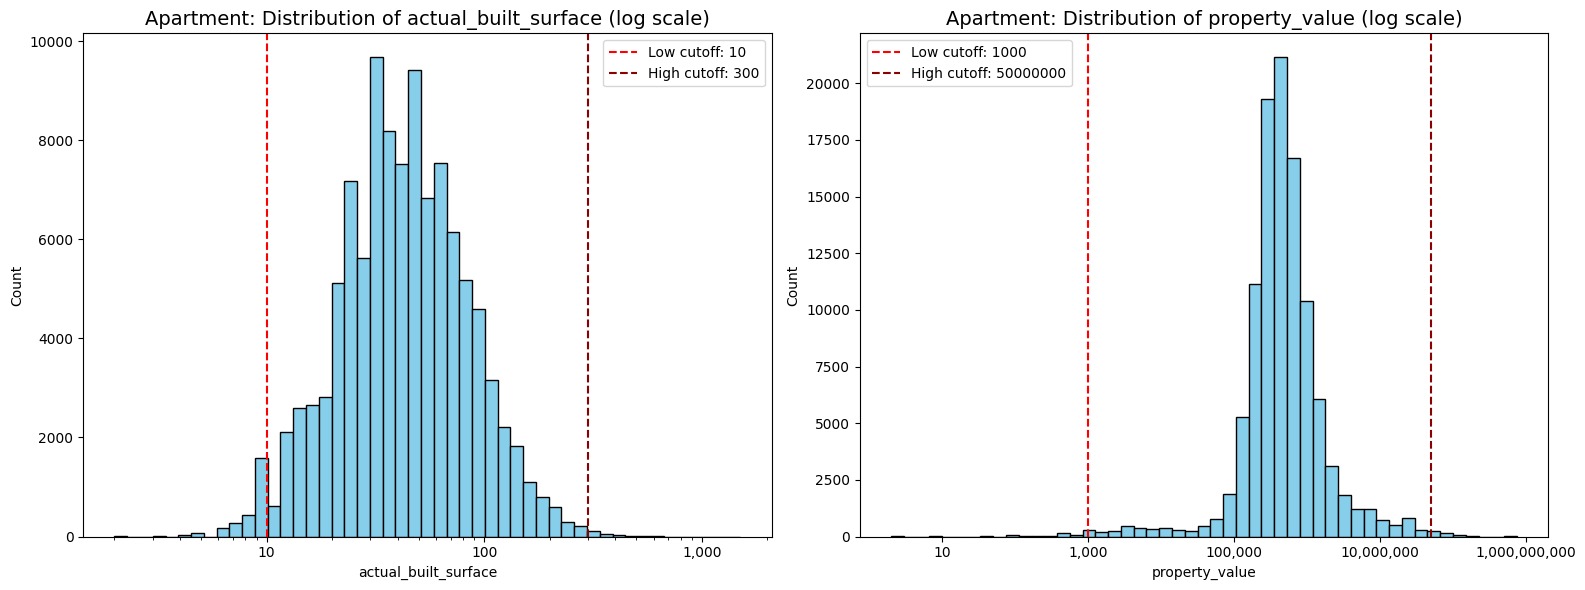

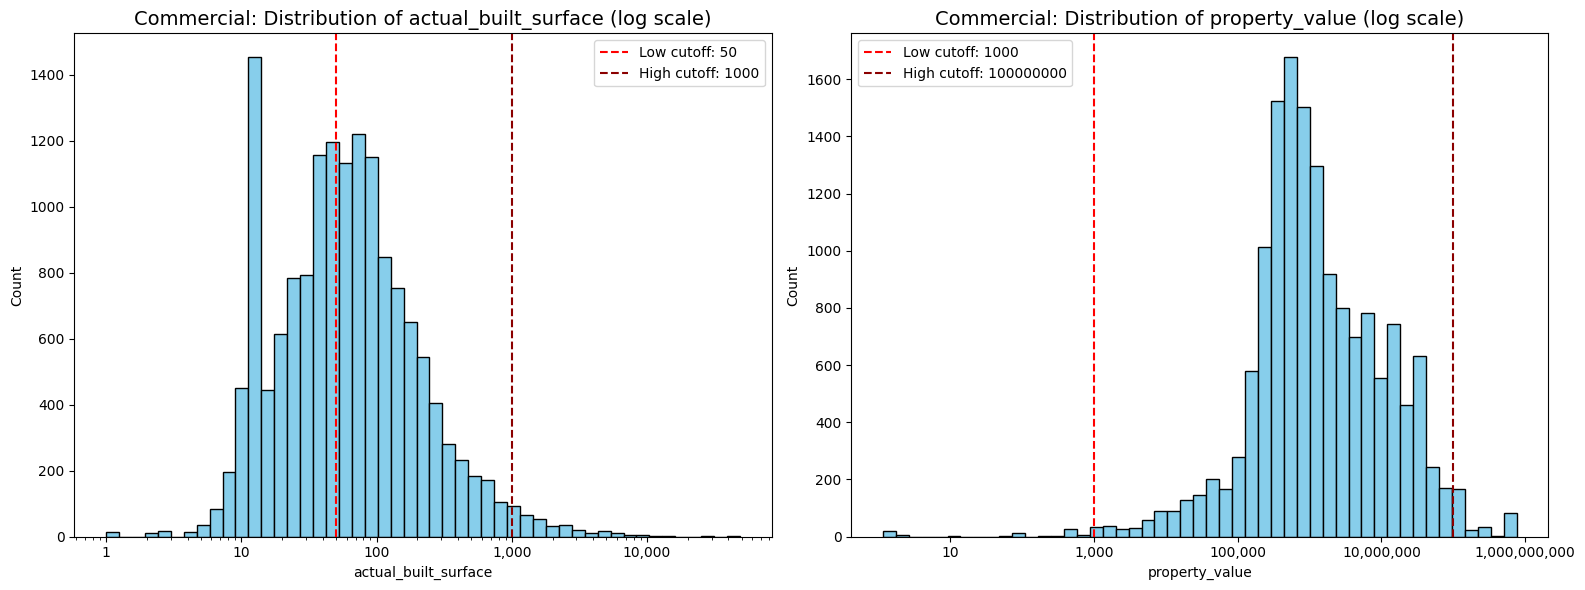

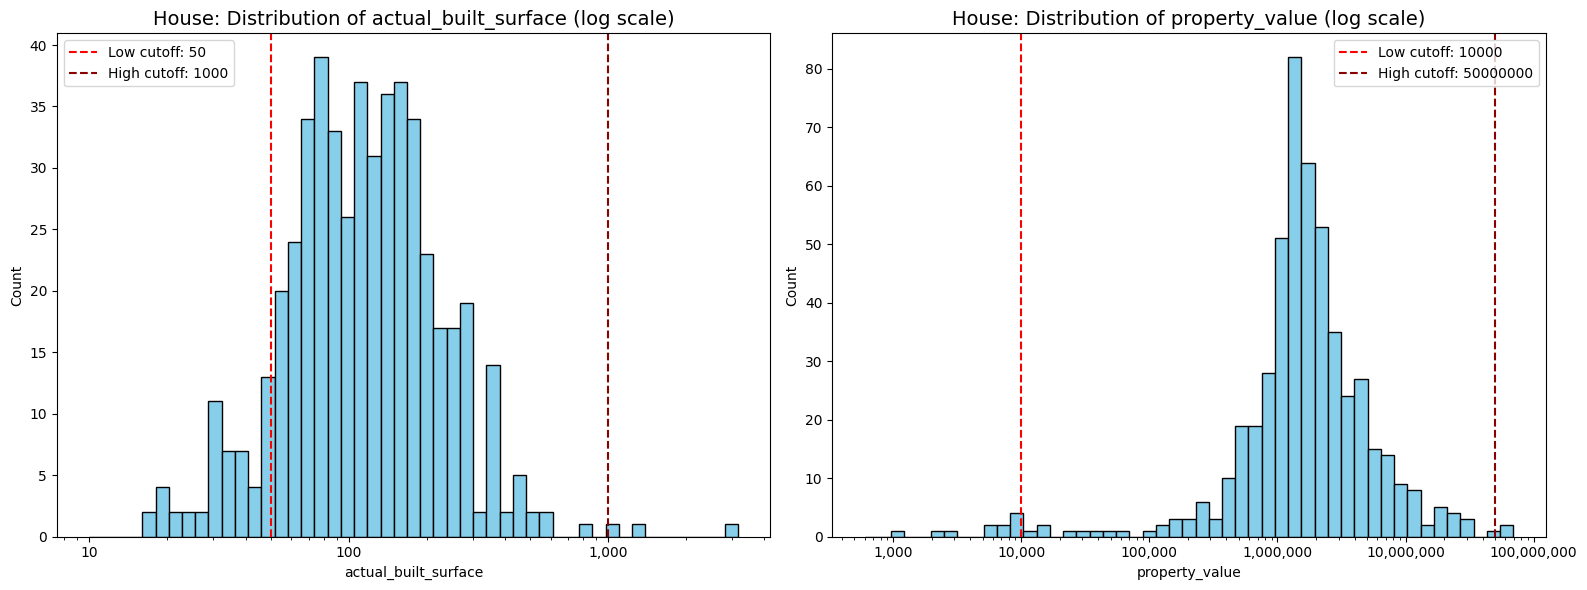

In [ ]:
def plot_distributions_by_type(
        df, local_type="Apartment", col1="actual_built_surface", col2="property_value",
        low_thresh1=None, high_thresh1=None, low_thresh2=None, high_thresh2=None,
        bins=50, price_per_sqm=False):

    # Filter dataset by property type (Apartment, Commercial, House, etc.)
    df = df[df["local_type"] == local_type].copy()

    # Optionally compute price per sqm
    if price_per_sqm and col2 == "price_per_sqm":
        df["price_per_sqm"] = df["property_value"] / df["actual_built_surface"]

    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    for i, col in enumerate([col1, col2]):
        data = df[col].dropna()

        # Create logarithmic bins (good for skewed real-estate data)
        bin_edges = np.logspace(np.log10(data.min()+1), np.log10(data.max()+1), bins)
        axes[i].hist(data, bins=bin_edges, color='skyblue', edgecolor='black')

        # Draw threshold lines (your chosen cut-offs)
        if i == 0:
            if low_thresh1 is not None:
                axes[i].axvline(low_thresh1, color='red', linestyle='--',
                                label=f'Low cutoff: {low_thresh1}')
            if high_thresh1 is not None:
                axes[i].axvline(high_thresh1, color='darkred', linestyle='--',
                                label=f'High cutoff: {high_thresh1}')
        else:
            if low_thresh2 is not None:
                axes[i].axvline(low_thresh2, color='red', linestyle='--',
                                label=f'Low cutoff: {low_thresh2}')
            if high_thresh2 is not None:
                axes[i].axvline(high_thresh2, color='darkred', linestyle='--',
                                label=f'High cutoff: {high_thresh2}')

        # Logarithmic x-axis (keeps distribution readable)
        axes[i].set_xscale('log')

        # Format ticks in human-readable numbers instead of scientific notation
        axes[i].xaxis.set_major_formatter(
            ticker.FuncFormatter(lambda x, _: f'{int(x):,}')
        )

        axes[i].set_title(f'{local_type}: Distribution of {col} (log scale)', fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# -----------------------------
# Example calls:

# Apartments
plot_distributions_by_type(
    df_all,
    local_type="Apartment",
    col1="actual_built_surface",
    col2="property_value",
    low_thresh1=10,
    high_thresh1=300,
    low_thresh2=1000,
    high_thresh2=50_000_000,
    bins=50
)

# Commercial
plot_distributions_by_type(
    df_all,
    local_type="Commercial",
    col1="actual_built_surface",
    col2="property_value",
    low_thresh1=50,
    high_thresh1=1000,
    low_thresh2=1000,
    high_thresh2=100_000_000,
    bins=50
)

# Houses
plot_distributions_by_type(
    df_all,
    local_type="House",
    col1="actual_built_surface",
    col2="property_value",
    low_thresh1=50,
    high_thresh1=1000,
    low_thresh2=10_000,
    high_thresh2=50_000_000,
    bins=50
)

#### Overview of outliers (Inter quartile range approach)

In [ ]:
# OVERVIEW OF OUTLIERS

num_cols = [
    c for c in df_all.select_dtypes(include=['int64', 'float64']).columns
    if c not in ['year', 'month', 'local_identifier', 'local_type_code',
                 'municipality_code', 'no_disposition', 'plan_number', 'postal_code']
]
def quick_outlier_check(df, col, iqr_mult=1.5):
    ser = df[col].dropna()
    if ser.empty:
        return None
    Q1, Q3 = ser.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - iqr_mult * IQR, Q3 + iqr_mult * IQR
    n_out = ((ser < lower) | (ser > upper)).sum()
    return {
        'Column': col,
        'Count': len(ser),
        'Outliers': n_out,
        'Outlier %': round(n_out / len(ser) * 100, 2),
        'Min': ser.min(),
        'Max': ser.max(),
        'Lower': lower,
        'Upper': upper
    }

results = [quick_outlier_check(df_all, c) for c in num_cols]
df_outliers = pd.DataFrame([r for r in results if r])
display(df_outliers)


,Column,Count,Outliers,Outlier %,Min,Max,Lower,Upper
0,Apartment,227358,38956,17.13,0.00,1.000000e+00,1.00,1.00
1,Outbuilding,227358,48878,21.50,0.00,1.000000e+00,1.00,1.00
2,Commercial,227358,26951,11.85,0.00,1.000000e+00,0.00,0.00
3,Unknown,227358,2383,1.05,0.00,1.000000e+00,0.00,0.00
4,House,227358,785,0.35,0.00,1.000000e+00,0.00,0.00
5,actual_built_surface,227358,11575,5.09,0.00,4.863000e+04,-69.00,115.00
6,property_value,227358,25382,11.16,0.15,1.003401e+09,-715068.75,1849681.25
7,square_meter_area_of_1st_lot,227358,14296,6.29,0.00,9.532000e+03,-51.30,85.50
8,square_meter_area_of_2nd_lot,227358,28061,12.34,0.00,1.010000e+03,0.00,0.00
9,square_meter_area_of_3rd_lot,227358,2547,1.12,0.00,1.091530e+03,0.00,0.00


#### Box plots, Top and lowest Outliers - column property value - (Inter quartile range approach)


📊 property_value
Count=227,358 | Mean=2259417.77 | IQR=(-715068.75, 1849681.25) | Outliers=25382 (11.16%)


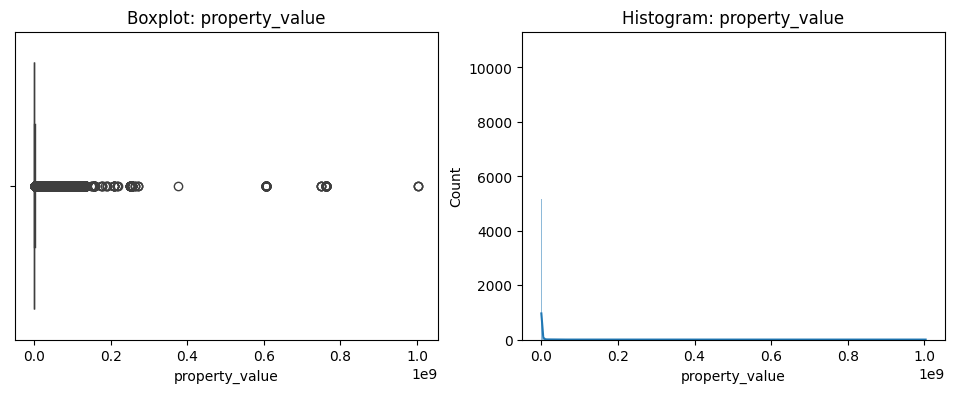

Top/Bottom outliers:


,local_type,municipality,postal_code,department_code,section,street_type,street_name,street_number,nature_of_transaction,transaction_date,actual_built_surface,1st_lot,number_of_lots,number_of_main_rooms,property_value
171993,Apartment,PARIS 07,75007.0,75,CI,RUE,DE L UNIVERSITE,211.0,Sale,2022-08-29,123.0,5,1,5.0,1850000.0
118081,Outbuilding,PARIS 16,75016.0,75,FL,AV,KLEBER,59.0,Sale,2022-11-29,0.0,36,1,0.0,1850000.0
118079,Apartment,PARIS 16,75016.0,75,FL,AV,KLEBER,59.0,Sale,2022-11-29,150.0,36,1,6.0,1850000.0
114040,Apartment,PARIS 16,75016.0,75,DJ,AV,GEORGES MANDEL,65.0,Sale,2022-06-08,131.0,105,2,4.0,1850000.0
57636,Outbuilding,PARIS 14,75014.0,75,AB,AV,DE L OBSERVATOIRE,34.0,Sale,2023-02-15,0.0,26,2,0.0,1850000.0


,local_type,municipality,postal_code,department_code,section,street_type,street_name,street_number,nature_of_transaction,transaction_date,actual_built_surface,1st_lot,number_of_lots,number_of_main_rooms,property_value
183012,Unknown,PARIS 13,75013.0,75,AB,BD,DE L HOPITAL,7.0,Sale,2022-12-19,10.0,No other lot,0,0.0,1.003401e+09
80667,Unknown,PARIS 13,Unknown,75,AK,Unknown,Unknown,Unknown,Sale,2022-12-19,10.0,No other lot,0,0.0,1.003401e+09
98936,Unknown,PARIS 13,Unknown,75,AB,Unknown,Unknown,Unknown,Sale,2022-12-19,10.0,No other lot,0,0.0,1.003401e+09
168196,Apartment,PARIS 01,75001.0,75,AY,RUE,DE CASTIGLIONE,14.0,Sale of property under construction,2023-01-04,66.0,No other lot,0,3.0,7.620000e+08
168179,Commercial,PARIS 01,75001.0,75,AY,RUE,DE CASTIGLIONE,14.0,Sale of property under construction,2023-01-04,20.0,No other lot,0,0.0,7.620000e+08


In [ ]:
# Numeric columns excluding identifiers
num_cols = [
    c for c in df_all.select_dtypes(include='number').columns
    if c not in ['year','month','local_identifier','local_type_code',
                 'municipality_code','no_disposition','plan_number','postal_code']
]

context_cols = [
    'local_type','municipality','postal_code','department_code','section',
    'street_type','street_name','street_number','nature_of_transaction',
    'transaction_date','actual_built_surface','1st_lot','number_of_lots','number_of_main_rooms'
]

def analyze_outliers(df, col, iqr=1.5, show_n=5, remove=False):
    """Quick IQR outlier check with plot & summary"""
    print(f"\n📊 {col}")
    s = df[col].dropna()
    if s.empty:
        print("→ Empty column"); return df

    q1, q3 = s.quantile([.25, .75])
    iqr_val = q3 - q1
    lower, upper = q1 - iqr*iqr_val, q3 + iqr*iqr_val
    outliers = df[(s < lower) | (s > upper)]
    pct = len(outliers) / len(df) * 100

    print(f"Count={len(s):,} | Mean={s.mean():.2f} | IQR=({lower:.2f}, {upper:.2f}) | Outliers={len(outliers)} ({pct:.2f}%)")

    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(x=s, ax=ax[0]); ax[0].set_title(f'Boxplot: {col}')
    sns.histplot(s, kde=True, ax=ax[1]); ax[1].set_title(f'Histogram: {col}')
    plt.show()

    if not outliers.empty:
        print("Top/Bottom outliers:")
        display(outliers.sort_values(col).head(show_n)[context_cols+[col]])
        display(outliers.sort_values(col, ascending=False).head(show_n)[context_cols+[col]])

    return df.loc[~df.index.isin(outliers.index)] if remove else outliers.index.tolist()

# Example run
outlier_indices = analyze_outliers(df_all, 'property_value')

# Optional loop for all numeric columns
# for col in num_cols: analyze_outliers(df_all, col)


## DATA EXPORT

#### Export data as csv from Google Collab or on local computer

In [ ]:
# Define output path (relative to your current working directory)
output_path = "transactions_with_unit_id.csv"

# Export CSV
df_all.to_csv(output_path, index=False, encoding="utf-8")

# Try Colab download; if not available, just save locally
try:
    from google.colab import files
    files.download(output_path)
    print(f"CSV downloaded from Google Colab: {output_path}")
except ModuleNotFoundError:
    print(f"CSV saved locally at: {os.path.abspath(output_path)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV downloaded from Google Colab: transactions_with_unit_id.csv


## DATA VISUALIZATION

#### Bar chart - number of properties by property type

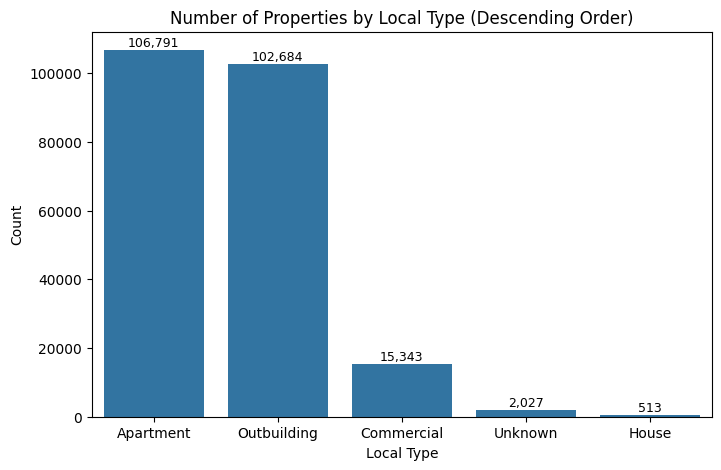

In [ ]:
plt.figure(figsize=(8,5))

# Sort order desc
order = df_all['local_type'].value_counts().index

sns.countplot(x='local_type', data=df_all, order=order)

plt.title('Number of Properties by Local Type (Descending Order)')
plt.xlabel('Local Type')
plt.ylabel('Count')

# Write numbers above columns
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

#### Trend chart - average property value over time

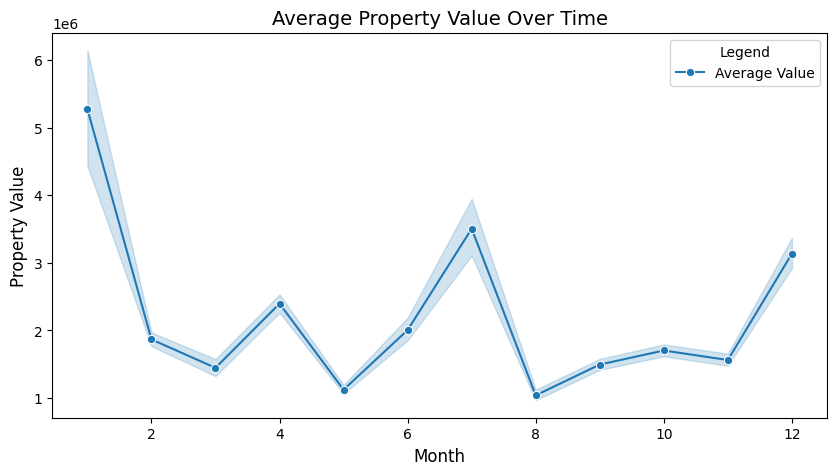

In [ ]:
plt.figure(figsize=(10,5))

# Lineplot: avg per month
sns.lineplot(x='month', y='property_value', data=df_all, estimator='mean', label='Average Value', marker='o')

# labels
plt.title('Average Property Value Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Property Value', fontsize=12)

# legend
plt.legend(title='Legend')

plt.show()


#### Bar chart - number of transactions by transaction type

/tmp/ipython-input-3472066602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


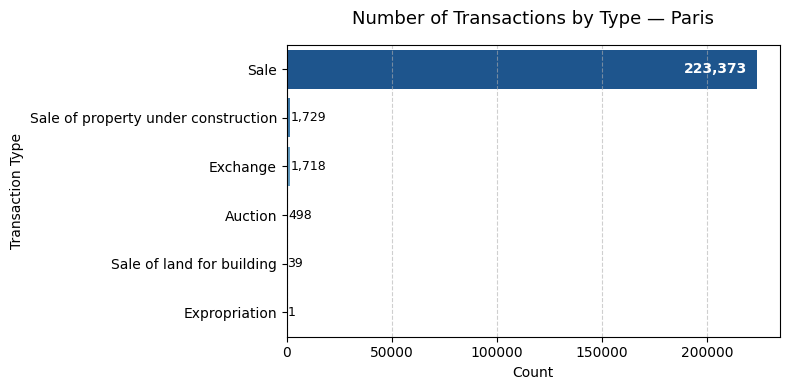

In [ ]:
# Visualize number of transactions by type
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    y='nature_of_transaction',
    data=df_all,
    order=df_all['nature_of_transaction'].value_counts().index,
    palette='Blues_r'
)

# Find max width (for highlighting the largest bar)
max_width = max(p.get_width() for p in ax.patches)

# Add labels to each bar
for p in ax.patches:
    width = p.get_width()
    label = f'{int(width):,}'
    if width == max_width:
        ax.text(
            width - (0.02 * width),
            p.get_y() + p.get_height() / 2,
            label,
            ha='right', va='center',
            color='white', fontsize=10, fontweight='bold'
        )
    else:
        ax.text(
            width + 300,
            p.get_y() + p.get_height() / 2,
            label,
            ha='left', va='center',
            color='black', fontsize=9
        )

# Final formatting
plt.title('Number of Transactions by Type — Paris', fontsize=13, pad=15)
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Trend chart - Median Apartment Price per m²

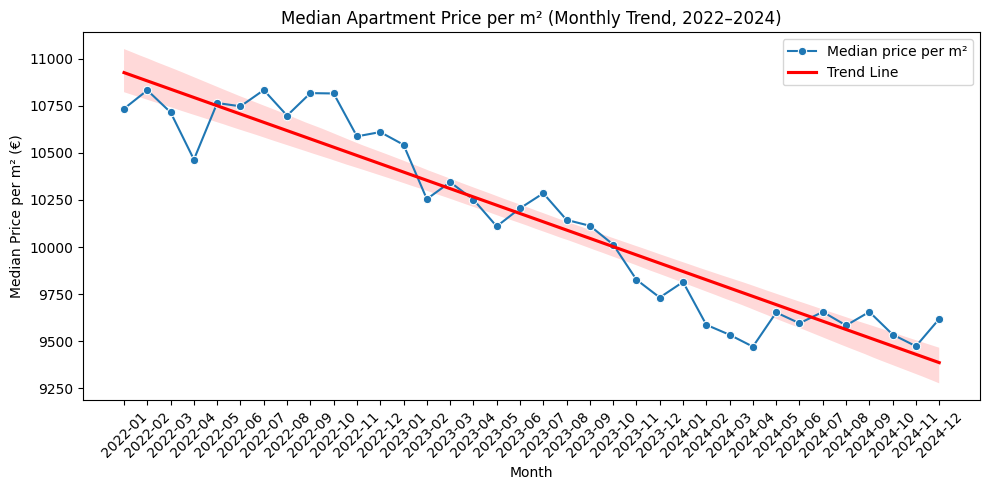

In [ ]:
#The chart shows prices per sq./m only for apartments (without anything) during 3 years with a trend line
#Filter only real apartments (exclude garages, cellars, outbuildings etc.)
df_ap = df_all[
    (df_all['local_type'] == 'Apartment') &
    (df_all['number_of_main_rooms'] > 0) &   # exclude parking/cellars (no rooms)
    (df_all['actual_built_surface'] > 10) &  # exclude tiny surfaces
    (df_all['property_value'] > 10000)
].copy()

#Calculate price per m²
df_ap['price_per_m2'] = df_ap['property_value'] / df_ap['actual_built_surface']

#Remove unrealistic price per m²
df_ap = df_ap[(df_ap['price_per_m2'] > 1000) & (df_ap['price_per_m2'] < 20000)]

#Group by month/year
df_ap['year_month'] = pd.to_datetime(df_ap['transaction_date']).dt.to_period('M')
trend = df_ap.groupby('year_month')['price_per_m2'].median().reset_index()  # медиана вместо среднего
trend['year_month'] = trend['year_month'].astype(str)

#Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='year_month', y='price_per_m2', marker='o', label='Median price per m²')
sns.regplot(data=trend, x=pd.to_numeric(trend.index), y='price_per_m2',
            scatter=False, color='red', label='Trend Line')
plt.title('Median Apartment Price per m² (Monthly Trend, 2022–2024)')
plt.xlabel('Month')
plt.ylabel('Median Price per m² (€)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Bar chart - Average Property Price by Type

/tmp/ipython-input-646126338.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


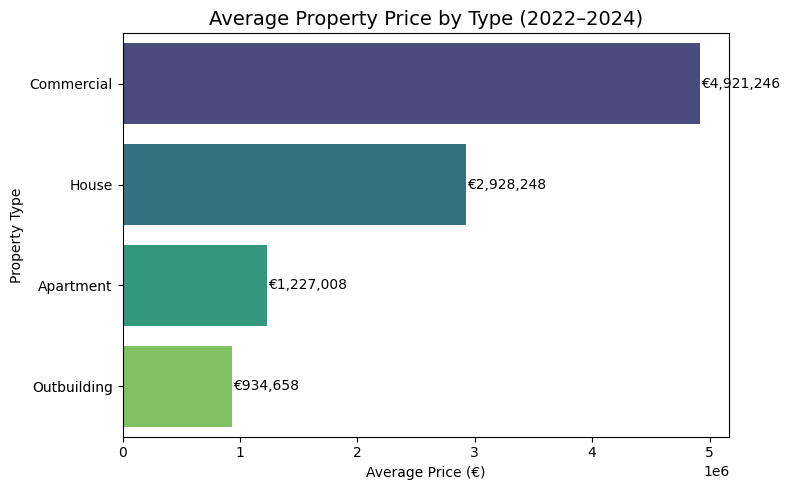

,local_type,avg_price
1,Commercial,4.921246e+06
2,House,2.928248e+06
0,Apartment,1.227008e+06
3,Outbuilding,9.346582e+05


In [ ]:
#The chart shows average property prices by the property type for whole period

#Filtering: only relevant property types
df_type = df_all[df_all['local_type'].isin(['Apartment', 'House', 'Commercial', 'Outbuilding'])].copy()

#Cleaning: remove zeros, NaN, and unrealistic values
df_type = df_type[(df_type['property_value'] > 10_000) & (df_type['property_value'] < 50_000_000)]

#Average price by property type
avg_price_type = (
    df_type.groupby('local_type', as_index=False)['property_value']
    .mean()
    .rename(columns={'property_value': 'avg_price'})
    .sort_values('avg_price', ascending=False)
)

#Visualization
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_price_type,
    x='avg_price',
    y='local_type',
    palette='viridis'
)

#Labels
for i, val in enumerate(avg_price_type['avg_price']):
    plt.text(val + 10000, i, f"€{val:,.0f}", va='center', fontsize=10, color='black')

plt.title('Average Property Price by Type (2022–2024)', fontsize=14)
plt.xlabel('Average Price (€)')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()

avg_price_type

#### Bar chart - Hot and Cold season / Most expensive & Cheapest months

/tmp/ipython-input-825116133.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], data=hot, x='month_name', y='count', palette='Reds_r')
/tmp/ipython-input-825116133.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], data=cold, x='month_name', y='count', palette='Blues')
/tmp/ipython-input-825116133.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], data=expensive, x='month_name', y='avg_price', palette='Oranges_r')
/tmp/ipython-input-825116133.py:49: FutureWarning: 

Passing `palette` without as

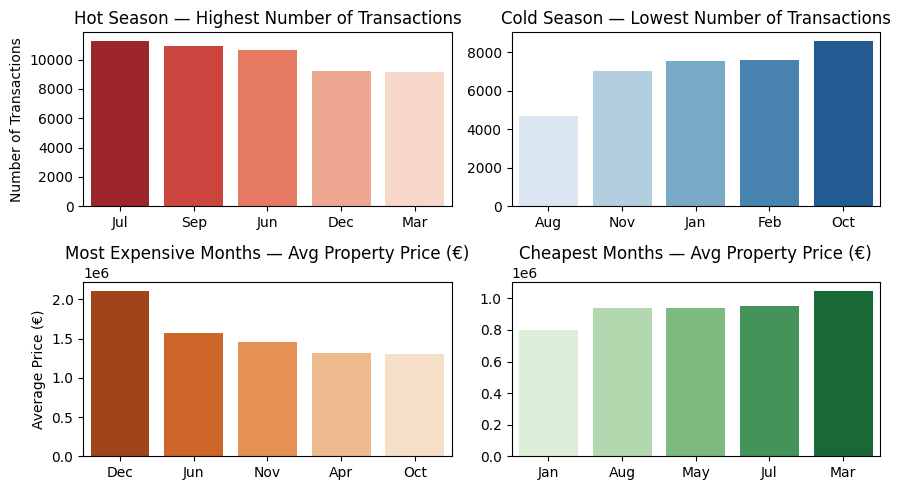

,month,avg_price,count,month_name
0,1,8.028626e+05,7552,Jan
1,2,1.124298e+06,7625,Feb
2,3,1.048971e+06,9179,Mar
3,4,1.319485e+06,8790,Apr
4,5,9.415399e+05,8644,May
5,6,1.564675e+06,10660,Jun
6,7,9.511510e+05,11300,Jul
7,8,9.382537e+05,4685,Aug
8,9,1.097082e+06,10951,Sep
9,10,1.308852e+06,8617,Oct


In [ ]:
#The charts show the most better and worse time periods
#for buying/selling real estate, but only for apartments and houses (all period of time),
#by transactions and average prices for whole property

#import calendar
#Filtering: only houses and apartments
df_temp = df_all[df_all['local_type'].isin(['Apartment', 'House'])].copy()

#Cleaning null and anomalous values
df_temp = df_temp[(df_temp['property_value'] > 10_000) & (df_temp['property_value'] < 50_000_000)]

#Adding the "month" column
df_temp['month'] = pd.to_datetime(df_temp['transaction_date'], errors='coerce').dt.month

#Grouping by month
month_stats = (
    df_temp.groupby('month')
    .agg(avg_price=('property_value', 'mean'),
         count=('property_value', 'count'))
    .reset_index()
)
month_stats['month_name'] = month_stats['month'].apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else None)


#Defining seasons and ranges
hot = month_stats.sort_values('count', ascending=False).head(5)
cold = month_stats.sort_values('count').head(5)
expensive = month_stats.sort_values('avg_price', ascending=False).head(5)
cheap = month_stats.sort_values('avg_price').head(5)

#Plotting 4 charts
fig, axes = plt.subplots(2, 2, figsize=(9, 5))

sns.barplot(ax=axes[0,0], data=hot, x='month_name', y='count', palette='Reds_r')
axes[0,0].set_title('Hot Season — Highest Number of Transactions')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Number of Transactions')

sns.barplot(ax=axes[0,1], data=cold, x='month_name', y='count', palette='Blues')
axes[0,1].set_title('Cold Season — Lowest Number of Transactions')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

sns.barplot(ax=axes[1,0], data=expensive, x='month_name', y='avg_price', palette='Oranges_r')
axes[1,0].set_title('Most Expensive Months — Avg Property Price (€)')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Average Price (€)')

sns.barplot(ax=axes[1,1], data=cheap, x='month_name', y='avg_price', palette='Greens')
axes[1,1].set_title('Cheapest Months — Avg Property Price (€)')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

plt.tight_layout()
plt.show()

month_stats

#### Pie Chart - Average Sale Price — Apartments vs Houses

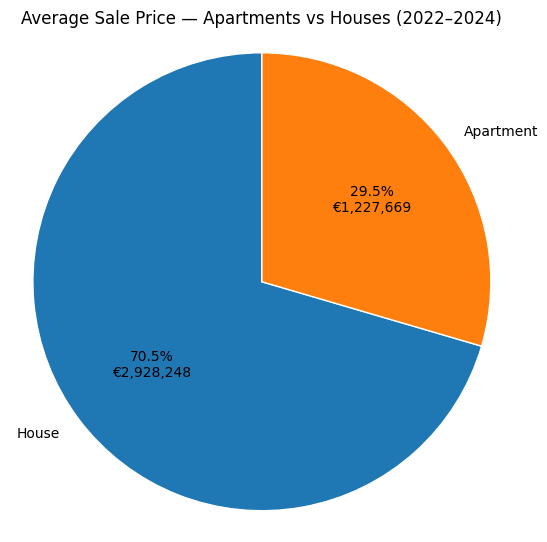

,local_type,avg_price
1,House,2.928248e+06
0,Apartment,1.227669e+06


In [ ]:
#This chart shows the proportion of the average property value
#(average sale price) only for
#houses and apartments by average prices (not for sq/m)

#Select only apartments and houses
df_sel = df_all[df_all['local_type'].isin(['Apartment', 'House'])].copy()

#Cleaning: remove nulls and anomalies
df_sel = df_sel[(df_sel['property_value'] > 10_000) & (df_sel['property_value'] < 50_000_000)]

#Exclude “false” apartments (garages/cellars without living rooms)
if 'number_of_main_rooms' in df_sel.columns:
    df_sel = df_sel[~((df_sel['local_type'] == 'Apartment') & (df_sel['number_of_main_rooms'] <= 0))]

#Average price by property type (NOT €/m²)
avg_price = (
    df_sel.groupby('local_type', as_index=False)['property_value']
    .mean()
    .rename(columns={'property_value': 'avg_price'})
    .sort_values('avg_price', ascending=False)
)

#Pie chart
labels = avg_price['local_type'].tolist()
values = avg_price['avg_price'].values

def autopct_format(vals):
    def _fmt(pct):
        total = sum(vals)
        val = pct * total / 100.0
        return f'{pct:.1f}%\n€{val:,.0f}'
    return _fmt

plt.figure(figsize=(6.5, 6.5))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    startangle=90,
    autopct=autopct_format(values),
    wedgeprops=dict(linewidth=1, edgecolor='white'),
    textprops=dict(color='black', fontsize=10)
)
plt.title('Average Sale Price — Apartments vs Houses (2022–2024)')
plt.axis('equal')
plt.show()

avg_price

#### Pie Charts - Top-5 Most Expensive Districts and Top-5 Cheapest Districts

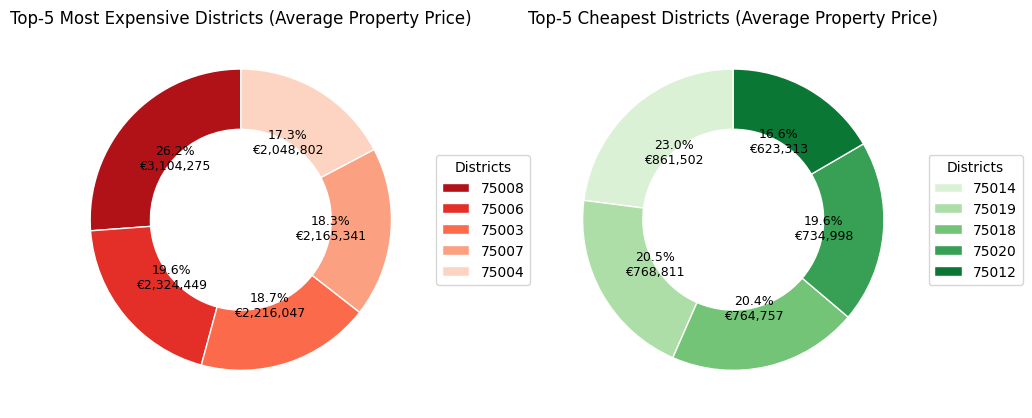

In [ ]:
#The chart shows the average price of apartments ('clean', without garages and etc.)
#and houses by Paris districts (Top 5 most expensive and Top 5 cheapest)


#Filtering: only real apartments and houses
df_exp = df_all[df_all['local_type'].isin(['Apartment', 'House'])].copy()
df_exp = df_exp[(df_exp['property_value'] > 10_000) & (df_exp['property_value'] < 50_000_000)]

#remove fake apartments (no living rooms)
if 'number_of_main_rooms' in df_exp.columns:
    df_exp = df_exp[~((df_exp['local_type'] == 'Apartment') & (df_exp['number_of_main_rooms'] <= 0))]

#Clean postal codes
pc_str = df_exp['postal_code'].astype(str).str.strip()
pc_str = pc_str.str.replace(r'\.0$', '', regex=True)
pc_str = pc_str.str.extract(r'(\d{5})', expand=False)
df_exp['postal_label'] = pc_str

#Drop rows without valid postal codes
df_exp = df_exp.dropna(subset=['postal_label'])

#Average price by district
districts = (
    df_exp.groupby('postal_label', as_index=False)['property_value']
          .mean()
          .rename(columns={'property_value': 'avg_price'})
          .sort_values('avg_price', ascending=False)
)

#Top-5 and Bottom-5
top5 = districts.head(5)
bottom5 = districts.tail(5)

#Donut charts
def autopct_for(vals):
    total = vals.sum()
    return lambda p: f'{p:.1f}%\n€{(p/100)*total:,.0f}'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#Top-5
colors_top = sns.color_palette('Reds_r', len(top5))
wedges1, texts1, autotexts1 = axes[0].pie(
    top5['avg_price'], labels=None,
    autopct=autopct_for(top5['avg_price']), startangle=90,
    colors=colors_top, wedgeprops=dict(width=0.4, edgecolor='white')
)
axes[0].set_title('Top-5 Most Expensive Districts (Average Property Price)')
axes[0].legend(
    wedges1, top5['postal_label'],
    title='Districts', loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1)
)

#Bottom-5
colors_bottom = sns.color_palette('Greens', len(bottom5))
wedges2, texts2, autotexts2 = axes[1].pie(
    bottom5['avg_price'], labels=None,
    autopct=autopct_for(bottom5['avg_price']), startangle=90,
    colors=colors_bottom, wedgeprops=dict(width=0.4, edgecolor='white')
)
axes[1].set_title('Top-5 Cheapest Districts (Average Property Price)')
axes[1].legend(
    wedges2, bottom5['postal_label'],
    title='Districts', loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1)
)

#Styling
for autotexts in [autotexts1, autotexts2]:
    for t in autotexts:
        t.set_fontsize(9)
        t.set_color('black')

plt.tight_layout()
plt.show()

#### Scatter plots - Number of transactions by Paris districts

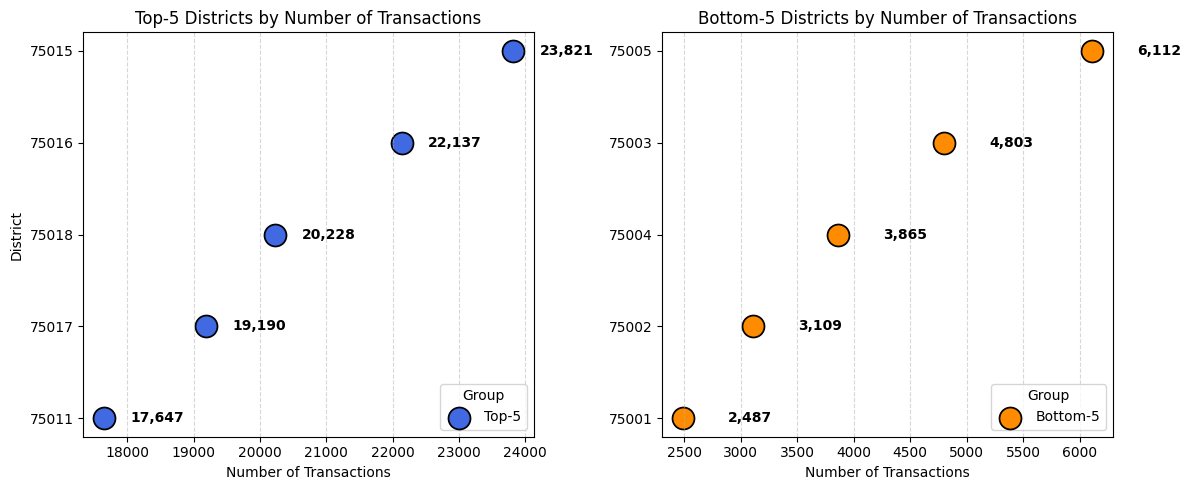

In [ ]:
#The chart shows the number of transactions by
#Paris districts (Top 5 and Bottom 5) across all property types.


#Counting the number of transactions by postal codes
district_counts = df_all['postal_code'].value_counts().reset_index()
district_counts.columns = ['postal_code', 'count']

#Cleaning labels: remove “.0”, keep only 5 digits
district_counts['postal_code'] = (
    district_counts['postal_code']
    .astype(str)
    .str.replace(r'\.0$', '', regex=True)
    .str.extract(r'(\d{5})', expand=False)
)

#Drop invalid postal codes (Unknown)
district_counts = district_counts.dropna(subset=['postal_code'])

#Top-5 and Bottom-5
top5 = district_counts.head(5)
bottom5 = district_counts.tail(5)

#Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=False)

#Top 5
sns.scatterplot(
    data=top5,
    x='count', y='postal_code',
    s=250, color='royalblue', edgecolor='black', ax=axes[0], label='Top-5'
)
for i, row in top5.iterrows():
    axes[0].text(
        row['count'] + 400, row['postal_code'],
        f"{row['count']:,}",
        va='center', ha='left', color='black', fontsize=10, fontweight='bold'
    )

axes[0].set_title('Top-5 Districts by Number of Transactions')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('District')
axes[0].grid(axis='x', linestyle='--', alpha=0.5)
axes[0].legend(title='Group', loc='lower right')

#Bottom 5
sns.scatterplot(
    data=bottom5,
    x='count', y='postal_code',
    s=250, color='darkorange', edgecolor='black', ax=axes[1], label='Bottom-5'
)
for i, row in bottom5.iterrows():
    axes[1].text(
        row['count'] + 400, row['postal_code'],
        f"{row['count']:,}",
        va='center', ha='left', color='black', fontsize=10, fontweight='bold'
    )

axes[1].set_title('Bottom-5 Districts by Number of Transactions')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.5)
axes[1].legend(title='Group', loc='lower right')

plt.tight_layout()
plt.show()
